# Quantium Virtual Internship Project - Retail Srategy and Analytics

## Task 1. Data preperation and customer analytics

In [2]:
# make all the necessery imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import re
import numpy as np

### Import datasets as pandas dataframes

In [3]:
customer_data = pd.read_csv("QVI_purchase_behaviour.csv")

In [4]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
transaction_data = pd.read_excel("QVI_transaction_data.xlsx")

In [6]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Examining transaction data

In [7]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [8]:
# convert excel style date to date format
transaction_data['DATE'] = pd.TimedeltaIndex(transaction_data['DATE'], unit='d') + dt.datetime(1899, 12, 30)
transaction_data['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [9]:
# make sure that we are looking at chips only
transaction_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [10]:
# get a list of words used in the PROD_NAME column
common_words_lists_of_lists = [i.split() for i in list(transaction_data['PROD_NAME'])]
common_words = []
for sublist in common_words_lists_of_lists:
    for word in sublist:
        common_words.append(word)

In [11]:
common_words[:10]

['Natural',
 'Chip',
 'Compny',
 'SeaSalt175g',
 'CCs',
 'Nacho',
 'Cheese',
 '175g',
 'Smiths',
 'Crinkle']

In [12]:
# drop all words including digits or special characters
clean_common_words = [word for word in common_words if not re.search(r'[@_!#$%^&*()<>?/\|}{~:0-9]', word)]
clean_common_words[:10]

['Natural',
 'Chip',
 'Compny',
 'CCs',
 'Nacho',
 'Cheese',
 'Smiths',
 'Crinkle',
 'Cut',
 'Chips']

In [13]:
# create a dictionary of word counts and sort it
word_counts = {}
for word in clean_common_words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_word_counts

[('Chips', 49770),
 ('Kettle', 41288),
 ('Smiths', 28860),
 ('Salt', 27976),
 ('Cheese', 27890),
 ('Pringles', 25102),
 ('Doritos', 24962),
 ('Crinkle', 23960),
 ('Corn', 22063),
 ('Original', 21560),
 ('Cut', 20754),
 ('Chip', 18645),
 ('Salsa', 18094),
 ('Chicken', 15407),
 ('Sea', 14145),
 ('Thins', 14075),
 ('Sour', 13882),
 ('Crisps', 12607),
 ('Vinegar', 12402),
 ('Chilli', 12389),
 ('RRD', 11894),
 ('Infuzions', 11057),
 ('Supreme', 10963),
 ('WW', 10320),
 ('Cobs', 9693),
 ('Popd', 9693),
 ('Tortilla', 9580),
 ('Tostitos', 9471),
 ('Twisties', 9454),
 ('Sensations', 9429),
 ('Old', 9324),
 ('El', 9324),
 ('Paso', 9324),
 ('Dip', 9324),
 ('Sweet', 7883),
 ('Lime', 7852),
 ('Tomato', 7669),
 ('Cream', 7618),
 ('Thinly', 7507),
 ('Tyrrells', 6442),
 ('And', 6373),
 ('BBQ', 6351),
 ('Tangy', 6332),
 ('Grain', 6272),
 ('Waves', 6272),
 ('Lightly', 6248),
 ('Salted', 6248),
 ('Soy', 6121),
 ('Natural', 6050),
 ('Mild', 6048),
 ('Red', 5885),
 ('Rock', 5885),
 ('Deli', 5885),
 ('Thai'

In [14]:
# drop all Salsa products from the transactions
filtered_transaction_data = transaction_data[~transaction_data.PROD_NAME.str.contains("Salsa")]
filtered_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
DATE              246742 non-null datetime64[ns]
STORE_NBR         246742 non-null int64
LYLTY_CARD_NBR    246742 non-null int64
TXN_ID            246742 non-null int64
PROD_NBR          246742 non-null int64
PROD_NAME         246742 non-null object
PROD_QTY          246742 non-null int64
TOT_SALES         246742 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [15]:
# get summary statistics of the transaction data
filtered_transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [16]:
# investigate the transactions where 200 bags of chip were bought
filtered_transaction_data[filtered_transaction_data['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [17]:
# what other transactions does this customer have?
filtered_transaction_data[filtered_transaction_data['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [18]:
# since this customer is not an ordinary retail customer, we will drop these records from the dataset
filtered_transaction_data = filtered_transaction_data[~(filtered_transaction_data['PROD_QTY'] == 200)]
filtered_transaction_data[filtered_transaction_data['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [19]:
# check the summary statistics of transaction data one more time
filtered_transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


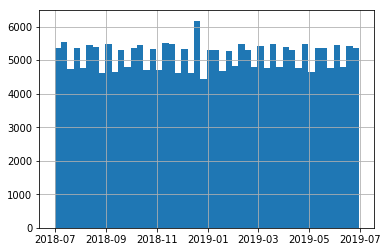

In [36]:
# plot transactions over time

filtered_transaction_data['DATE'].hist(bins=48)
plt.show()

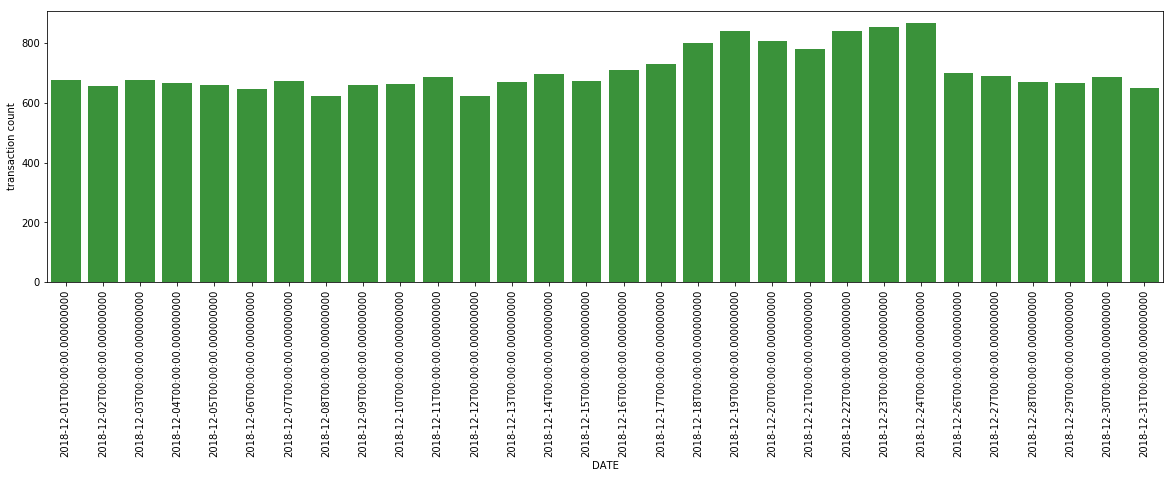

In [38]:
# zoom in December 2018 transactions

default_color = sb.color_palette()[2]
plt.figure(figsize = [20,5])

sb.countplot(x='DATE', data=filtered_transaction_data[
    (filtered_transaction_data['DATE'] <= '2018-12-31') & (filtered_transaction_data['DATE'] >= '2018-12-01')], 
             color=default_color)
plt.xticks(rotation=90)
plt.ylabel('transaction count')
plt.show()